# Load TensorFlow Libary and Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd

# Load dataset from Keras dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

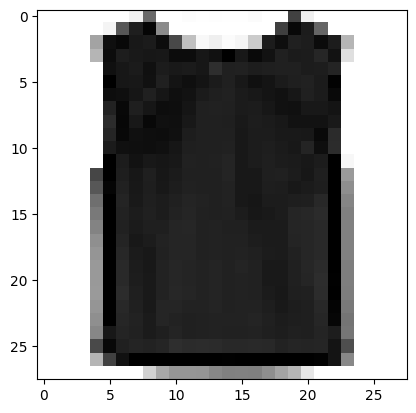

In [ ]:
plt.imshow(X_train[55], cmap="binary")
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[55]]

'Shirt'

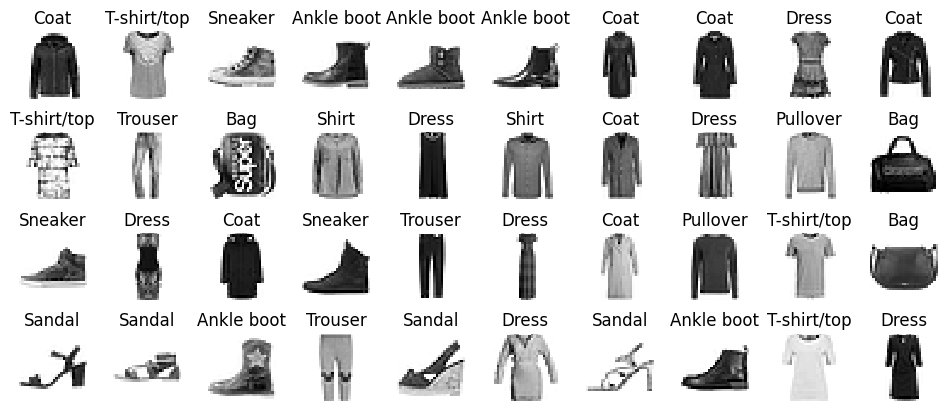

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Design and build Neural Network to classify the MINST

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=[28, 28], name="input_layer"))
model.add(keras.layers.Flatten(name="1st_layer_flatten"))
model.add(keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"))
model.add(keras.layers.Dense(100, activation="relu", name="3nd_hidden_layer"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_layer"))

In [ ]:
# Another way to build the Sequential model
model = keras.models.Sequential([
                                keras.layers.Input(shape=[28, 28], name="input_layer"),
                                keras.layers.Flatten(name="1st_layer_flatten"),
                                keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"),
                                keras.layers.Dense(100, activation="relu", name="3nd_hidden_layer"),
                                keras.layers.Dense(10, activation="softmax", name="Output_layer"),
])

# Check the model object

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer_flatten (Flatten)  (None, 784)              0         
                                                                 
 2nd_hidden_layer (Dense)    (None, 200)               157000    
                                                                 
 3nd_hidden_layer (Dense)    (None, 100)               20100     
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


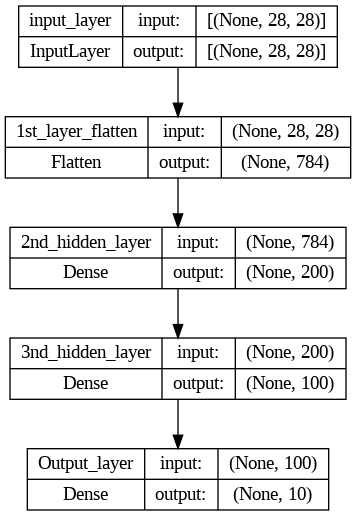

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Complie the model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7524 - accuracy: 0.7512 - val_loss: 0.5213 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4962 - accuracy: 0.8270 - val_loss: 0.4534 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4498 - accuracy: 0.8418 - val_loss: 0.4280 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4217 - accuracy: 0.8526 - val_loss: 0.4404 - val_accuracy: 0.8392
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4032 - accuracy: 0.8585 - val_loss: 0.3989 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3877 - accuracy: 0.8631 - val_loss: 0.3853 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3745 - accuracy: 0.8696 - val_loss: 0.3801 - val_accuracy:

# Plot the learning curve

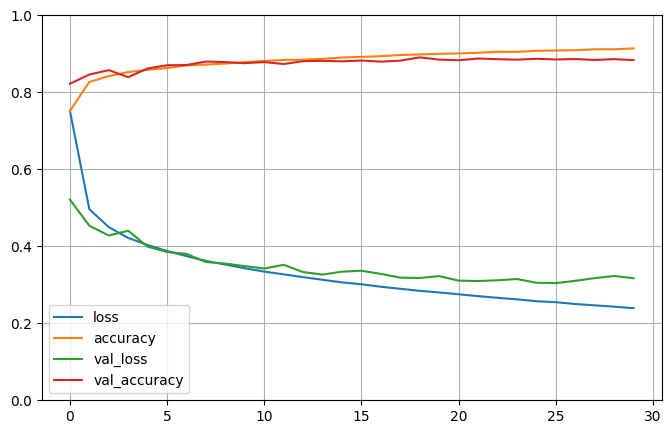

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3574 - accuracy: 0.8690


[0.3573664426803589, 0.8690000176429749]

In [ ]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[3.3128617e-06, 1.7944028e-08, 3.6283175e-06, ..., 7.4429829e-03,
        1.6401499e-04, 9.9125087e-01],
       [3.0201736e-05, 5.5845745e-10, 9.9885881e-01, ..., 1.9486225e-11,
        1.1181630e-08, 6.8991666e-12],
       [5.2735923e-06, 9.9999410e-01, 6.3514427e-08, ..., 3.8776058e-09,
        2.8153340e-09, 1.5047479e-13],
       ...,
       [5.3187171e-03, 2.4701328e-07, 1.1318312e-04, ..., 3.1698445e-07,
        9.9413264e-01, 1.4081795e-08],
       [1.5774684e-05, 9.9975097e-01, 6.5333038e-06, ..., 2.0500069e-07,
        6.6431724e-08, 5.3744305e-08],
       [3.8907169e-06, 1.3463544e-05, 8.4280633e-05, ..., 1.9743002e-03,
        4.2474820e-04, 2.2749100e-05]], dtype=float32)

In [ ]:
y_pred.shape, y_test.shape

((10000, 10), (10000,))

In [ ]:
acc = tf.keras.metrics.sparse_categorical_accuracy(y_test, y_pred)

In [ ]:
acc.numpy().sum() / acc.numpy().shape[0]

0.869